# **Assignment 1, regression task**
### Ostapovich Oleg

### Data preprocessing

In [147]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [148]:
#loading data
bitrate_df = pd.read_csv('bitrate_prediction/bitrate_train.csv')
bitrate_test = pd.read_csv('bitrate_prediction/bitrate_test.csv')

In [149]:
bitrate_df.head()

,fps_mean,fps_std,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,bitrate_mean,bitrate_std,target
0,24.4,0.516398,91.1,6.723921,0.0,0.0,0.0,460.5,7.648529,616.0
1,28.6,2.065591,99.7,15.923777,0.0,0.0,0.0,616.3,155.414893,565.0
2,30.0,0.000000,98.1,11.798776,0.0,0.0,0.0,565.2,9.077445,573.0
3,30.3,0.948683,99.4,13.014522,0.0,0.0,0.0,573.8,28.350191,585.0
4,29.9,0.316228,123.2,62.476307,0.0,0.0,0.0,585.8,59.458295,555.0


In [150]:
# Splitting data to X and Y
Y_train = bitrate_df.iloc[:,-1]
X_train = bitrate_df.iloc[:,:-1]

Y_test = bitrate_test.iloc[:,-1]
X_test = bitrate_test.iloc[:,:-1]

In [151]:
# scaling for data
from sklearn.preprocessing import MinMaxScaler

scalertrain = MinMaxScaler()
X_train = scalertrain.fit_transform(X_train)
scalertrainX = MinMaxScaler()
X_test = scalertrainX.fit_transform(X_test)

In [152]:
X_train[:5]

array([[1.24352332e-01, 1.68116146e-03, 7.06289152e-03, 1.65117917e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.09405594e-03,
        2.84241786e-04],
       [1.60621762e-01, 6.72464583e-03, 7.72964089e-03, 3.91036856e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.49417301e-03,
        5.77567334e-03],
       [1.72711572e-01, 0.00000000e+00, 7.60559449e-03, 2.89740071e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.70697159e-03,
        3.37344470e-04],
       [1.75302245e-01, 3.08849081e-03, 7.70638219e-03, 3.19594890e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.83945558e-03,
        1.05357627e-03],
       [1.71848014e-01, 1.02949694e-03, 9.55157229e-03, 1.53421760e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.02431698e-03,
        2.20964468e-03]])

### Data visualization

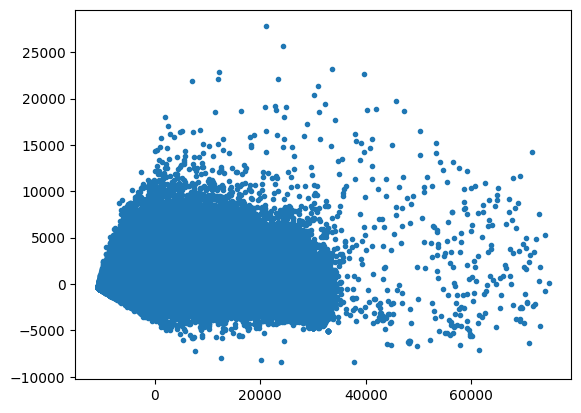

In [153]:
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=2)
reduced_df = dim_reducer.fit_transform(bitrate_df)
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], marker='.')
plt.show()

### Feature selection with Lasso

In [154]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1).fit(X_train,Y_train)
y_pred = lasso.predict(X_test)
y_pred_train = lasso.predict(X_train)
print("MSE on testset:", mean_squared_error(Y_test, y_pred))
print('MAE on testset:', mean_absolute_error(Y_test, y_pred))
print('r2 score on testset:', r2_score(Y_test, y_pred))

print('\nMSE on trainset:', mean_squared_error(Y_train, y_pred_train))
print('MAE on trainset:', mean_absolute_error(Y_train, y_pred_train))
print('r2 score on trainset:', r2_score(Y_train,y_pred_train))

MSE on testset: 3841877.7038015635
MAE on testset: 1078.092563818297
r2 score on testset: 0.892265702711045

MSE on trainset: 3902365.858055429
MAE on trainset: 1097.0172146236744
r2 score on trainset: 0.8941149269209263


### Regression task

In [155]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,Y_train)
y_pred = ridge.predict(X_test)
y_pred_train = ridge.predict(X_train)
print("MSE on testset:", mean_squared_error(Y_test, y_pred))
print('MAE on testset:', mean_absolute_error(Y_test, y_pred))
print('r2 score on testset:', r2_score(Y_test, y_pred))

print('\nMSE on trainset:', mean_squared_error(Y_train, y_pred_train))
print('MAE on trainset:', mean_absolute_error(Y_train, y_pred_train))
print('r2 score on trainset:', r2_score(Y_train,y_pred_train))

MSE on testset: 3843313.533181104
MAE on testset: 1078.590453311015
r2 score on testset: 0.8922254390480245

MSE on trainset: 3901988.6682319324
MAE on trainset: 1097.1644009847344
r2 score on trainset: 0.8941251614231434


In [156]:
#LinearRegression
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(X_train,Y_train)
y_pred = linear.predict(X_test)
y_pred_train = linear.predict(X_train)
print("MSE on testset:", mean_squared_error(Y_test, y_pred))
print('MAE on testset:', mean_absolute_error(Y_test, y_pred))
print('r2 score on testset:', r2_score(Y_test, y_pred))

print('\nMSE on trainset:', mean_squared_error(Y_train, y_pred_train))
print('MAE on trainset:', mean_absolute_error(Y_train, y_pred_train))
print('r2 score on trainset:', r2_score(Y_train,y_pred_train))

MSE on testset: 3845429.7289774735
MAE on testset: 1079.010242799703
r2 score on testset: 0.8921660964857088

MSE on trainset: 3901928.1975220307
MAE on trainset: 1096.6503317404397
r2 score on trainset: 0.8941268022087001


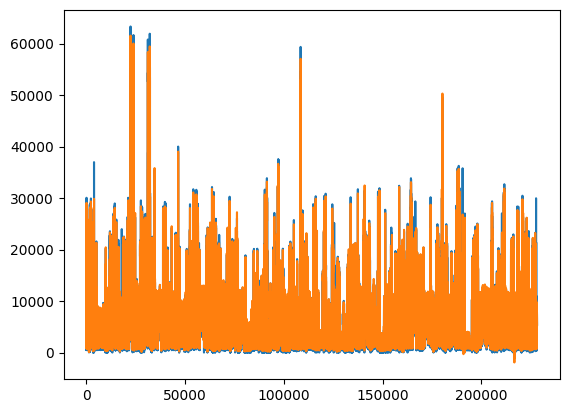

In [157]:
# Visualizing results
import matplotlib.pyplot as plt
plt.plot(Y_test)
plt.plot(y_pred)
plt.show()

In [158]:
#PolynomialRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures().fit_transform(X_train, Y_train)
poly_test = PolynomialFeatures().fit_transform(X_test, Y_test)
polyF = LinearRegression().fit(poly, Y_train)
y_pred = polyF.predict(poly_test)
y_pred_train = polyF.predict(poly)
print("MSE on testset:", mean_squared_error(Y_test, y_pred))
print('MAE on testset:', mean_absolute_error(Y_test, y_pred))
print('r2 score on testset:', r2_score(Y_test, y_pred))

print('\nMSE on trainset:', mean_squared_error(Y_train, y_pred_train))
print('MAE on trainset:', mean_absolute_error(Y_train, y_pred_train))
print('r2 score on trainset:', r2_score(Y_train,y_pred_train))

MSE on testset: 4220447.187091616
MAE on testset: 1091.9088122214278
r2 score on testset: 0.8816498215191634

MSE on trainset: 3849304.4536298555
MAE on trainset: 1066.6118855226298
r2 score on trainset: 0.8955546716526209


Seems like every represented models can deal with regression task. Also we can see that models are underfitted because of difference between train and test set error is small

In [159]:
#Let's see the results of cross validation score
from sklearn.model_selection import cross_val_score
print('Lasso cross validation score:', cross_val_score(lasso, X_test,Y_test, cv=3))
print('Ridge Classifier cross validation score:', cross_val_score(ridge, X_test,Y_test, cv=3))
print('Linear Regression cross validation score:', cross_val_score(linear, X_test,Y_test, cv=3))
print('Polynomial Regression cross validation score:', cross_val_score(polyF, X_test,Y_test, cv=3))

Lasso cross validation score: [0.8962703  0.88609272 0.88441563]
Ridge Classifier cross validation score: [0.89627145 0.8861019  0.88440216]
Linear Regression cross validation score: [0.89627749 0.8861281  0.88440339]
Polynomial Regression cross validation score: [0.89627749 0.8861281  0.88440339]


In [160]:
#Let's see the results of cross validation score
from sklearn.model_selection import cross_val_score
print('Lasso cross validation score:', cross_val_score(lasso, X_train,Y_train, cv=3))
print('Ridge Classifier cross validation score:', cross_val_score(ridge, X_train,Y_train, cv=3))
print('Linear Regression cross validation score:', cross_val_score(linear, X_train,Y_train, cv=3))
print('Polynomial Regression cross validation score:', cross_val_score(polyF, X_train,Y_train, cv=3))

Lasso cross validation score: [0.89078023 0.90654334 0.87724635]
Ridge Classifier cross validation score: [0.89077646 0.90651329 0.87725491]
Linear Regression cross validation score: [0.89077952 0.90651063 0.87725111]
Polynomial Regression cross validation score: [0.89077952 0.90651063 0.87725111]
